In [1]:
import sys
import logging
import os

import cv2
import joblib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import tiatoolbox
from IPython.utils import io as IPyIO
from tqdm import tqdm
import random

mpl.rcParams['figure.dpi'] = 300

# adding the project root folder
sys.path.append('../')
from tiatoolbox.models import IOSegmentorConfig, SemanticSegmentor
from tiatoolbox.utils.visualization import overlay_prediction_contours

NUM_TYPES = 7

|2025-03-14|20:16:31.818| [WARNING] /home/mf774/miniconda3/envs/tiatoolbox/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

|2025-03-14|20:16:36.874| [WARNING] /home/mf774/miniconda3/envs/tiatoolbox/lib/python3.12/site-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.21). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()



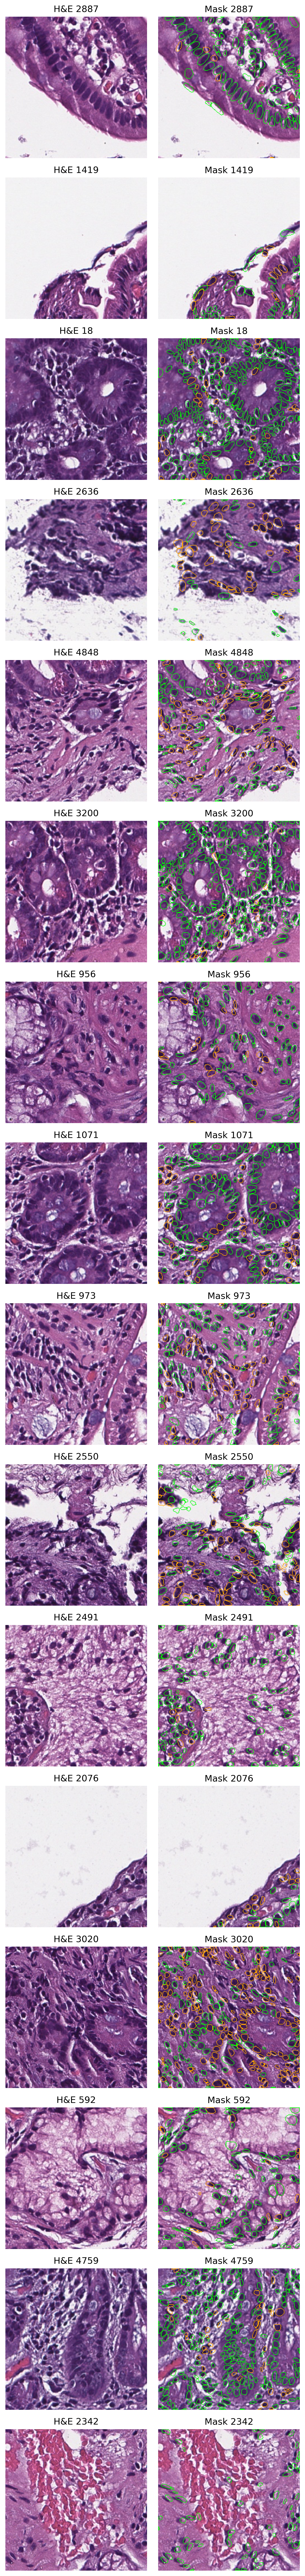

In [ ]:
from net_desc import HoVerNetConic
model = HoVerNetConic(num_types=NUM_TYPES)
DIRECTORIES = '/rds/user/mf774/hpc-work/part_II_project/in-house/training-CD3/'
PERCEPTIVE_COLORS = [
        (  0,   0,   0),
        (255, 165,   0),
        (  0, 255,   0),
        (255,   0,   0),
        (  0, 255, 255),
        (  0,   0, 255),
        (255, 255,   0),
    ]

def plot_fig(he_images, masks, directory):
    
    random_indices = random.sample(range(len(he_images)), 16)  # Unique numbers

    fig, axes = plt.subplots(16, 2, figsize=(6, 48))
    for i, idx in enumerate(random_indices):
        img = he_images[idx].astype(np.uint8)

        inst_map = np.trunc(masks[idx][:,:,0])
        type_map = np.trunc(masks[idx][:,:,1])
    
        pred_inst_dict = model._get_instance_info(inst_map, type_map)

        inst_type_colours = np.array([
            PERCEPTIVE_COLORS[v['type']]
            for v in pred_inst_dict.values()
        ])
        overlaid_he = overlay_prediction_contours(
            img, pred_inst_dict,
            inst_colours=inst_type_colours,
            line_thickness=1
        )

        axes[i, 0].imshow(img)
        axes[i, 0].axis("off")
        axes[i, 0].set_title(f"H&E {idx}")
        
        axes[i, 1].imshow(overlaid_he, cmap="gray")
        axes[i, 1].axis("off")
        axes[i, 1].set_title(f"Mask {idx}")

    plt.tight_layout()
    plt.savefig(f'{DIRECTORIES}/{directory}/aligned_masks.png')
    plt.show()

he_images = np.load('/rds/user/mf774/hpc-work/part_II_project/in-house/training-CD3/fold_2/images.npy', mmap_mode='r')
masks = np.load('/rds/user/mf774/hpc-work/part_II_project/in-house/training-CD3/fold_2/labels.npy', mmap_mode='r')
directory = 'fold_1'

plot_fig(he_images, masks, directory)